# EDA

https://www.kaggle.com/parulpandey/eda-and-preprocessing-for-bert

In [1]:
import os
import re
import string
import nltk

import numpy as np 
import pandas as pd

# sklearn 
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Visualisation libraries
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import seaborn as sns

nltk
numpy
pandas
sklearn
matplotlib
seaborn

tensorflow                         2.2.0    
transformers                       3.3.1      
tokenizers                         0.8.1rc2           


In [2]:
os.listdir()

['spilt_roberta0.705.ipynb',
 'data',
 'git',
 'input',
 'train_split.csv',
 'archive.zip',
 'image',
 '.ipynb_checkpoints',
 'roberta0.712',
 'test_split.csv',
 'eda-and-preprocessing-for-bert.ipynb',
 'EDA.ipynb',
 'tensorflow-roberta-0-705.ipynb']

In [3]:
train = pd.read_csv('train_split.csv')
test = pd.read_csv('test_split.csv')
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (21984, 4)
Testing data shape:  (5496, 4)


In [4]:
train.head()

,textID,text,selected_text,sentiment
0,b7797a8477,I created my account just to get a chance to ...,: I ADMIRE YOU! you`re amazing! you inspire me...,positive
1,cbdb23868f,too kind Jim too kind brother,kind,positive
2,69879e6134,"Oh, I`ve just watched the third episode of JON...",it`s awesome.,positive
3,169ca458b0,GrimeStopper loss client lost their job so we...,GrimeStopper loss client lost their job so we...,neutral
4,0dbaca8e07,goood,goood,positive


In [5]:
test_y = pd.DataFrame(test['selected_text'])
test_y

,selected_text
0,"Its been a slow day at home, one of my kids is..."
1,missed
2,I like them.
3,Grad present photos on facebook
4,"kinda cute, to be honest"
...,...
5491,Aw! Tear! I feel special to da family. Haha t...
5492,you are right
5493,self-portrait week http://unbecominglily.blogs...
5494,The time is not my friend today


In [6]:
del test['selected_text']
test.head()

,textID,text,sentiment
0,85a02242e3,"Its been a slow day at home, one of my kids is...",neutral
1,a0e0ed4311,about to head to Starbucks. was gonna take the...,negative
2,f5f2a709ca,I like them. I mean I like what`s left of them.,positive
3,064985c587,Grad present photos on facebook,neutral
4,5ab37ce023,"That`s kinda cute, to be honest",positive


**Columns**   
`textID` - unique ID for each piece of text   
`text` - the text of the tweet   
`sentiment` - the general sentiment of the tweet   
`selected_text` - [train only] the text that supports the tweet's sentiment   

---

### 결측치 찾기

In [7]:
train.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [8]:
test.isnull().sum()

textID       0
text         0
sentiment    0
dtype: int64

이미 데이터분리 단계에서 삭제해줬기에 없다.

---
## 칼럼별 정보 확인

In [13]:
# Positive tweet
print("Positive Tweet example :",train[train['sentiment']=='positive']['text'].values[0])
#negative_text
print("Negative Tweet example :",train[train['sentiment']=='negative']['text'].values[0])
#neutral_text
print("Neutral tweet example  :",train[train['sentiment']=='neutral']['text'].values[0])

Positive Tweet example :  I created my account just to get a chance to chat with you (: I ADMIRE YOU! you`re amazing! you inspire me to write  <3
Negative Tweet example : _mactastic I dunno ;p How`d I end up waking up at 2 am? It`s a mysterious world
Neutral tweet example  : GrimeStopper loss  client lost their job so we did too. Hope the quote later today turns into more work. Drowned my sorrows w a huge h ...


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# 각 감정별 이름 label과 유니크한 숫자 
data = list(train.sentiment.unique()) # pandas.Series 타입에서 list로 변환
size_abs = list(train.sentiment.value_counts()) # 개수 count
size_ratio = [int(round(n+0.001,2)*100) for n in list(train.sentiment.value_counts(normalize=True))] # 소수점 두자리까지만 출력
print(data)
print(size_abs)
print(size_ratio)
print("검증:\n", train.sentiment.value_counts())

['positive', 'neutral', 'negative']
[8919, 6838, 6227]
[41, 31, 28]
검증:
 neutral     8919
positive    6838
negative    6227
Name: sentiment, dtype: int64


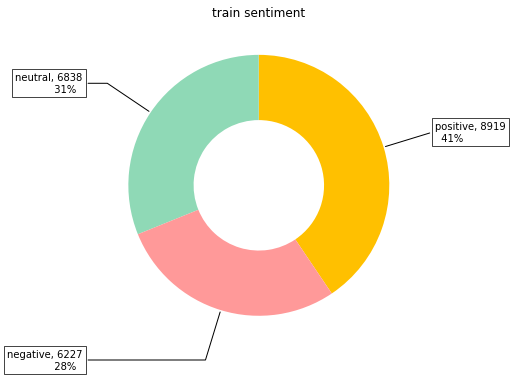

In [16]:
fig, ax = plt.subplots(figsize=(7,6), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(size_abs, colors = ['#ffc000', '#8fd9b6', '#ff9999'], wedgeprops=dict(width=0.5), startangle=-56)
bbox_props = dict(boxstyle="square, pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
         bbox=bbox_props, zorder=0, va="center")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(data[i]+", "+str(size_abs[i])+"\n  "+str(size_ratio[i])+"%  ", 
                xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
ax.set_title("train sentiment")
plt.show()

In [19]:
# 각 감정별 이름 label과 유니크한 숫자 
data = list(test.sentiment.unique()) # pandas.Series 타입에서 list로 변환
size_abs = list(test.sentiment.value_counts()) # 개수 count
size_ratio = [int(round(n+0.001,2)*100) for n in list(test.sentiment.value_counts(normalize=True))] # 소수점 두자리까지만 출력
print(data)
print(size_abs)
print(size_ratio)
print("검증:\n", test.sentiment.value_counts())

['neutral', 'negative', 'positive']
[2198, 1744, 1554]
[40, 32, 28]
검증:
 neutral     2198
positive    1744
negative    1554
Name: sentiment, dtype: int64


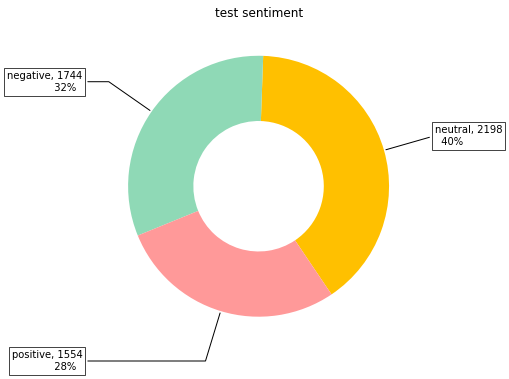

In [20]:
fig, ax = plt.subplots(figsize=(7,6), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(size_abs, colors = ['#ffc000', '#8fd9b6', '#ff9999'], wedgeprops=dict(width=0.5), startangle=-56)
bbox_props = dict(boxstyle="square, pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
         bbox=bbox_props, zorder=0, va="center")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(data[i]+", "+str(size_abs[i])+"\n  "+str(size_ratio[i])+"%  ", 
                xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
ax.set_title("test sentiment")
plt.show()

샘플뽑아보기

# 4. Text Data Preprocessing
Before we start with any NLP project we need to pre-process the data to get it all in a consistent format.We need to clean, tokenize and convert our data into a matrix. Let's create a function which will perform the following tasks on the text columns:

- Make text lowercase, 
- removes hyperlinks,
- remove punctuation
- removes numbers
- tokenizes
- removes stopwords# 

In [21]:
# text preprocessing helper functions

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)# 특수문자 [.*?]는 삭제
    text = re.sub('https?://\S+|www\.\S+', '', text)# 주소는 삭제
    text = re.sub('<.*?>+', '', text)# 특수문자 <.*?>는 삭제
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)# 구두점 제거
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)#[a-z][0-9][a-z]인 패턴은 지우겠다.
    return text

def text_preprocessing(text):
    """
    Cleaning and parsing the text.

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    #remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(tokenized_text)
    return combined_text

In [22]:
print(clean_text('안녕하세요. [삭제 될까?] <삭제?* 될까?>   ?????? ... ^^'))

안녕하세요       


In [23]:
print(clean_text('https://www.naver.com/   이 주소는 삭제 될까?'))

   이 주소는 삭제 될까


In [24]:
print(clean_text('엔터 \n  a3a'))

엔터   


clean_text가 잘 되는 지

In [25]:
# Applying the cleaning function to both test and training datasets
train['text_clean'] = train['text'].apply(str).apply(lambda x: text_preprocessing(x))
test['text_clean'] = test['text'].apply(str).apply(lambda x: text_preprocessing(x))

In [26]:
train.head()

,textID,text,selected_text,sentiment,text_clean
0,b7797a8477,I created my account just to get a chance to ...,: I ADMIRE YOU! you`re amazing! you inspire me...,positive,i created my account just to get a chance to c...
1,cbdb23868f,too kind Jim too kind brother,kind,positive,too kind jim too kind brother
2,69879e6134,"Oh, I`ve just watched the third episode of JON...",it`s awesome.,positive,oh ive just watched the third episode of jonas...
3,169ca458b0,GrimeStopper loss client lost their job so we...,GrimeStopper loss client lost their job so we...,neutral,grimestopper loss client lost their job so we ...
4,0dbaca8e07,goood,goood,positive,goood


In [27]:
test.head()

,textID,text,sentiment,text_clean
0,85a02242e3,"Its been a slow day at home, one of my kids is...",neutral,its been a slow day at home one of my kids is ...
1,a0e0ed4311,about to head to Starbucks. was gonna take the...,negative,about to head to starbucks was gonna take the ...
2,f5f2a709ca,I like them. I mean I like what`s left of them.,positive,i like them i mean i like whats left of them
3,064985c587,Grad present photos on facebook,neutral,grad present photos on facebook
4,5ab37ce023,"That`s kinda cute, to be honest",positive,thats kinda cute to be honest


전처리가 끝난 텍스트를 칼럼에 추가하였다.

In [28]:
train['text_len'] = train['text_clean'].astype(str).apply(len)
train['text_word_count'] = train['text_clean'].apply(lambda x: len(str(x).split()))

In [29]:
train.head(3)

,textID,text,selected_text,sentiment,text_clean,text_len,text_word_count
0,b7797a8477,I created my account just to get a chance to ...,: I ADMIRE YOU! you`re amazing! you inspire me...,positive,i created my account just to get a chance to c...,109,23
1,cbdb23868f,too kind Jim too kind brother,kind,positive,too kind jim too kind brother,29,6
2,69879e6134,"Oh, I`ve just watched the third episode of JON...",it`s awesome.,positive,oh ive just watched the third episode of jonas...,58,11


In [30]:
pos = train[train['sentiment']=='positive']
neg = train[train['sentiment']=='negative']
neutral = train[train['sentiment']=='neutral']

In [31]:
pos.head(3)

,textID,text,selected_text,sentiment,text_clean,text_len,text_word_count
0,b7797a8477,I created my account just to get a chance to ...,: I ADMIRE YOU! you`re amazing! you inspire me...,positive,i created my account just to get a chance to c...,109,23
1,cbdb23868f,too kind Jim too kind brother,kind,positive,too kind jim too kind brother,29,6
2,69879e6134,"Oh, I`ve just watched the third episode of JON...",it`s awesome.,positive,oh ive just watched the third episode of jonas...,58,11


In [32]:
neg.head(3)

,textID,text,selected_text,sentiment,text_clean,text_len,text_word_count
5,0be24d40d5,_mactastic I dunno ;p How`d I end up waking up...,mysterious,negative,mactastic i dunno p howd i end up waking up at...,72,16
9,04e52d731e,my phone died,my phone died,negative,my phone died,13,3
13,f691634e87,my head is hurting..,hurting..,negative,my head is hurting,18,4


In [33]:
neutral.head(3)

,textID,text,selected_text,sentiment,text_clean,text_len,text_word_count
3,169ca458b0,GrimeStopper loss client lost their job so we...,GrimeStopper loss client lost their job so we...,neutral,grimestopper loss client lost their job so we ...,131,26
7,e299da7d2f,we won`t be in town email me if there is ano...,we won`t be in town email me if there is anot...,neutral,we wont be in town email me if there is anothe...,58,13
8,3848e03ac5,u really don`t think so? maybe ur right....l...,u really don`t think so? maybe ur right....lo...,neutral,u really dont think so maybe ur rightlol btw w...,103,23


Text(0.5, 0, 'Data')

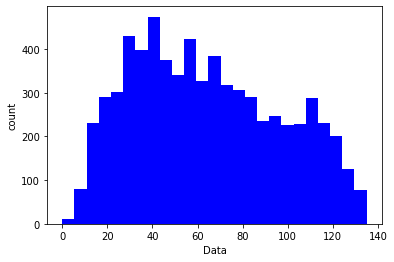

In [34]:
x = np.array(train[train["sentiment"]=="positive"].text_len.values)
plt.hist(x, density=False, bins=25, color='blue')  # `density=False` would make counts
plt.ylabel('count')
plt.xlabel('Data')

Text(0.5, 0, 'Data')

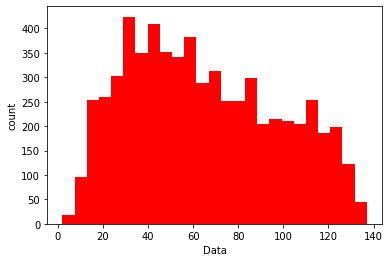

In [35]:
x = np.array(train[train["sentiment"]=="negative"].text_len.values)
plt.hist(x, density=False, bins=25, color='red')  # `density=False` would make counts
plt.ylabel('count')
plt.xlabel('Data')

Text(0.5, 0, 'Data')

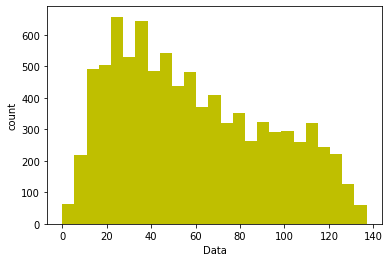

In [36]:
x = np.array(train[train["sentiment"]=="neutral"].text_len.values)
plt.hist(x, density=False, bins=25, color='y')  # `density=False` would make counts
plt.ylabel('count')
plt.xlabel('Data')

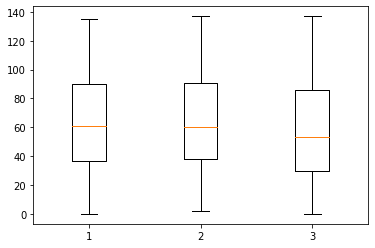

In [37]:
# boxplot
bp_data = [pos.text_len.values, neg.text_len.values, neutral.text_len.values]
fig1, ax1 = plt.subplots()
ax1.set_title('')
ax1.boxplot(bp_data)
plt.show()

Text(0.5, 0, 'Data')

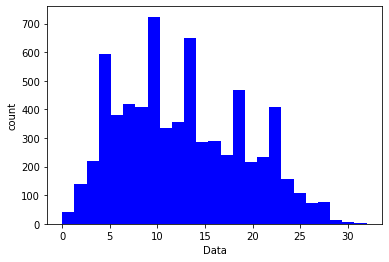

In [38]:
x = np.array(train[train["sentiment"]=="positive"].text_word_count.values)
plt.hist(x, density=False, bins=25, color='blue')  # `density=False` would make counts
plt.ylabel('count')
plt.xlabel('Data')

Text(0.5, 0, 'Data')

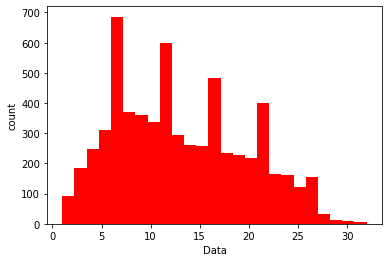

In [39]:
x = np.array(train[train["sentiment"]=="negative"].text_word_count.values)
plt.hist(x, density=False, bins=25, color='red')  # `density=False` would make counts
plt.ylabel('count')
plt.xlabel('Data')

Text(0.5, 0, 'Data')

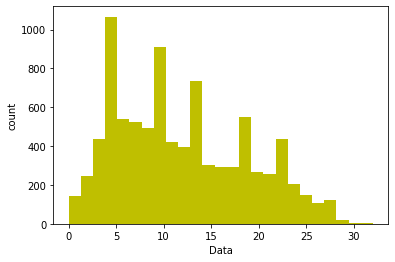

In [40]:
x = np.array(train[train["sentiment"]=="neutral"].text_word_count.values)
plt.hist(x, density=False, bins=25, color='y')  # `density=False` would make counts
plt.ylabel('count')
plt.xlabel('Data')

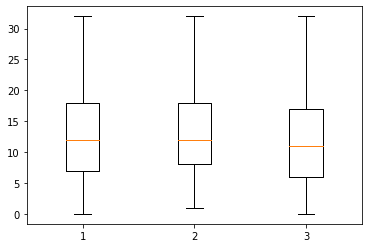

In [41]:
# boxplot
bp_data = [pos.text_word_count.values, neg.text_word_count.values, neutral.text_word_count.values]
fig1, ax1 = plt.subplots()
ax1.set_title('')
ax1.boxplot(bp_data)
plt.show()

## 6. Ngram exploration
https://www.kaggle.com/raenish/tweet-sentiment-insight-eda

In [42]:
#source of code : https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [43]:
pos_unigrams = get_top_n_words(pos['text_clean'],20)
neg_unigrams = get_top_n_words(neg['text_clean'],20)
neutral_unigrams = get_top_n_words(neutral['text_clean'],20)



#for word, freq in top_unigrams:
    #print(word, freq)
df1 = pd.DataFrame(pos_unigrams, columns = ['Text' , 'count'])
df1.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black',color='red', title='Top 20 Unigrams in positve text',orientation='h')

df2 = pd.DataFrame(neg_unigrams, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black', color='green',title='Top 20 Unigrams in negative text',orientation='h')

df3 = pd.DataFrame(neutral_unigrams, columns = ['Text' , 'count'])
df3.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 Unigrams in neutral text',orientation='h')

In [44]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)# 여기가 차이
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [45]:
pos_bigrams = get_top_n_gram(pos['text_clean'],(2,2),20)
neg_bigrams = get_top_n_gram(neg['text_clean'],(2,2),20)
neutral_bigrams = get_top_n_gram(neutral['text_clean'],(2,2),20)



#for word, freq in top_bigrams:
    #print(word, freq)
df1 = pd.DataFrame(pos_bigrams, columns = ['Text' , 'count'])
df1.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black',color='red', title='Top 20 Bigrams in positve text',orientation='h')

df2 = pd.DataFrame(neg_bigrams, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black', color='green',title='Top 20 Bigrams in negative text',orientation='h')

df3 = pd.DataFrame(neutral_bigrams, columns = ['Text' , 'count'])
df3.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 Bigrams in neutral text',orientation='h')

In [46]:
pos_trigrams = get_top_n_gram(pos['text_clean'],(3,3),20)
neg_trigrams = get_top_n_gram(neg['text_clean'],(3,3),20)
neutral_trigrams = get_top_n_gram(neutral['text_clean'],(3,3),20)

df1 = pd.DataFrame(pos_trigrams, columns = ['Text' , 'count'])
df1.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black',color='red', title='Top 20 Trigrams in positve text',orientation='h')

df2 = pd.DataFrame(neg_trigrams, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black', color='green',title='Top 20 Trigrams in negative text',orientation='h')

df3 = pd.DataFrame(neutral_trigrams, columns = ['Text' , 'count'])
df3.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 Trigrams in neutral text',orientation='h')

# 7. Exploring the `selected_text` column

Now let us explore the `selected_text` column

In [47]:
positive_text = train[train['sentiment'] == 'positive']['selected_text']
negative_text = train[train['sentiment'] == 'negative']['selected_text']
neutral_text = train[train['sentiment'] == 'neutral']['selected_text']

In [48]:
# Positive text
print("Positive Text example :",positive_text.values[0])
#negative_text
print("Negative Tweet example :",negative_text.values[0])
#neutral_text
print("Neutral tweet example  :",neutral_text.values[0])

Positive Text example : : I ADMIRE YOU! you`re amazing! you inspire me to write  <3
Negative Tweet example : mysterious
Neutral tweet example  : GrimeStopper loss  client lost their job so we did too. Hope the quote later today turns into more work. Drowned my sorrows w a huge h ...


## Pre-processed selected text columns

In [49]:
positive_text_clean = positive_text.apply(lambda x: text_preprocessing(x))
negative_text_clean = negative_text.apply(lambda x: text_preprocessing(x))
neutral_text_clean = neutral_text.apply(lambda x: text_preprocessing(x))

In [50]:
#source of code : https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [51]:
top_words_in_positive_text = get_top_n_words(positive_text_clean)
top_words_in_negative_text = get_top_n_words(negative_text_clean)
top_words_in_neutral_text = get_top_n_words(neutral_text_clean)

p1 = [x[0] for x in top_words_in_positive_text[:20]]
p2 = [x[1] for x in top_words_in_positive_text[:20]]


n1 = [x[0] for x in top_words_in_negative_text[:20]]
n2 = [x[1] for x in top_words_in_negative_text[:20]]


nu1 = [x[0] for x in top_words_in_neutral_text[:20]]
nu2 = [x[1] for x in top_words_in_neutral_text[:20]]

In [52]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=p1, y=p2, text=p2 )])
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',title_text='Most common positive_text words')
#fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

In [53]:
fig1 = go.Figure([go.Bar(x=n1, y=n2, text=n2,marker_color='indianred')])
#fig1.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig1.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',title_text='Most common negative_text words')


In [54]:
fig2 = go.Figure([go.Bar(x=nu1, y=nu2, text=nu2, marker_color='lightsalmon' )])
#fig2.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig2.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',title_text='Most common neutral_text words')


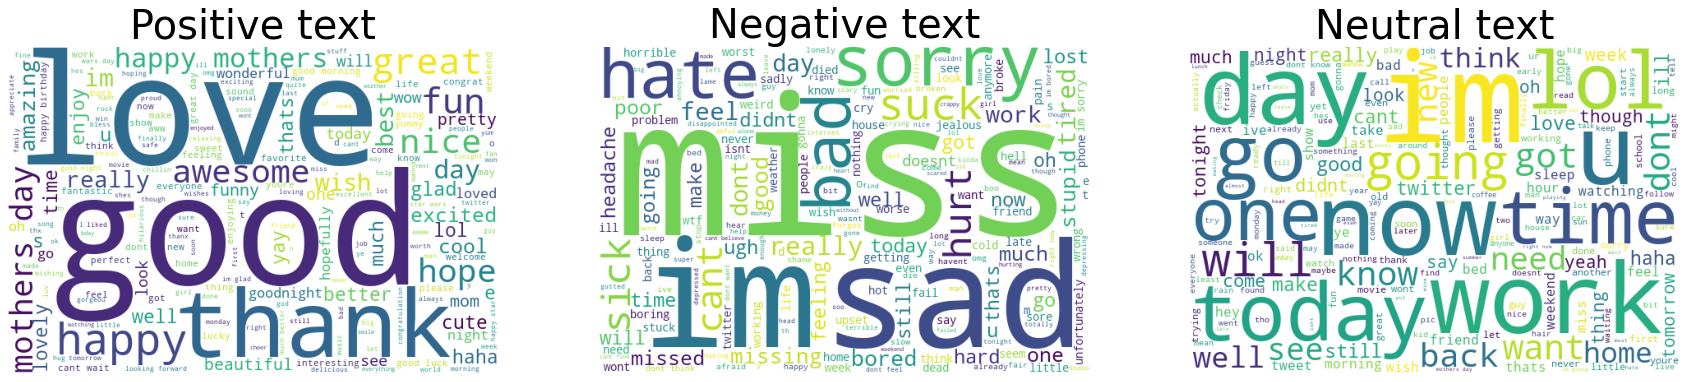

In [57]:
from wordcloud import WordCloud
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[30, 15])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(positive_text_clean))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive text',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(negative_text_clean))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative text',fontsize=40);

wordcloud3 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(neutral_text_clean))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Neutral text',fontsize=40);
